# Multiclass Classification project
-  how to read different sizes image from the directory.
-  how to implement one vs one scheme for multiclass classification
-  how to use svm for image classiication

In [1]:
import numpy as np
# for iterating over folders and working with files , we need two important things that you should remember
import os
from pathlib import Path 
from keras.preprocessing import image # for reading image
# you can use either of them or both of them

Using TensorFlow backend.


In [2]:
p=Path("../SVM/images/")
print(p)
print(type(p))

..\SVM\images
<class 'pathlib.WindowsPath'>


In [3]:
# glob mthod accepts one regular expression, for what kin of file you want to look in this folder.
dirs=p.glob("*") # it returns a generator object, on which we can iterate and get all the values in this folder.

In [4]:
labels=[]
label=[]
img_data=[]
count=0
labels_dict={"cats":0,"dogs":1,"horses":2,"Humans":3}
for folder_dir in dirs:
    labels=str(folder_dir).split("\\")[-1]
    for img_path in folder_dir.glob("*jpg"):
        img=image.load_img(img_path,target_size=(32,32))
        count+=1
        img_array=image.img_to_array(img)
        img_data.append(img_array)
        label.append(labels_dict[labels])

In [5]:
print(len(img_data))
print(len(label))
print(label)

808
808
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
# convert this data into numpy array
img_data=np.array(img_data)
label=np.array(label)
print(img_data.shape,label.shape)

(808, 32, 32, 3) (808,)


In [7]:
import random
combined=list(zip(img_data,label))
random.shuffle(combined)
# unzip
img_data[:],label[:]=zip(*combined)

### Visualise this data

In [8]:
from matplotlib import pyplot as plt
def drawImg(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

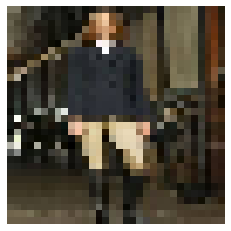

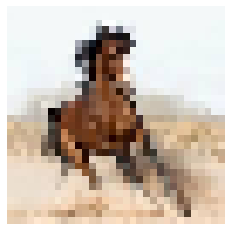

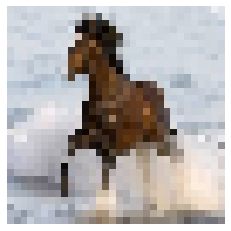

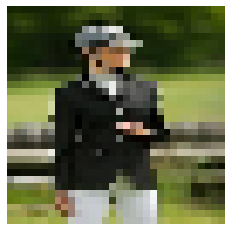

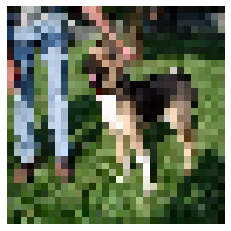

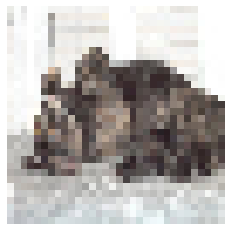

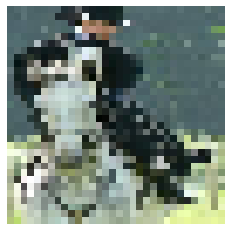

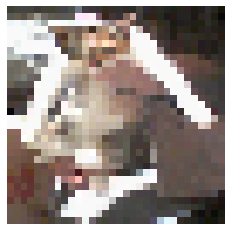

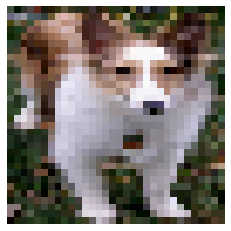

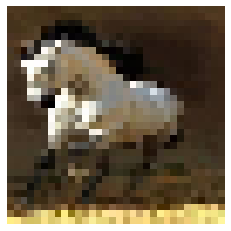

In [9]:
for i in range(10):
    drawImg(img_data[i]/255.0)

when working with machine learning algorithm, it is always a good practice that data should be shuffled.

# SVM Classifier

In [68]:
class SVM:
    def __init__(self,c=1.0):
        self.c=c
        self.w=0
        self.b=0
    def hinge_loss(self,w,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(w,w.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T)+b)
            loss+=self.c*max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,learning_rate=0.001,batch_size=50,max_itr=300):
        n_features=X.shape[1]
        n_samples=X.shape[0]
        n=learning_rate
        c=self.c
        # init the model parameters
        w=np.zeros((1,n_features))
        b=0
        losses=[]
        count=0
        for i in range(max_itr):
            l=self.hinge_loss(w,b,X,Y)
            #print(l)
            count+=1
            losses.append(l)
            ids=np.arange(n_samples)
            np.random.shuffle(ids)
            for batch_start in range(0,n_samples,batch_size):
                # assume 0 gradient for the batch
                gradb=0
                gradw=0
                for j in range(batch_start,batch_start+batch_size):
                    if j<n_samples:
                        val=ids[j]
                        ti=Y[val]*(np.dot(w,X[val].T)+b)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=self.c*Y[val]*X[val]
                            gradb+=self.c*Y[val]
                # gradient for the batch is ready , update w and b
                w=w-n*w+n*gradw
                b=b+n*gradb
            self.w=w
            self.b=b
        return (w,b,losses)

# we need to convert data for one-to-one classifier

In [69]:
# lets flatten every image into a single row first
m=img_data.shape[0]
img_data=img_data.reshape((m,-1))
print(img_data.shape,label.shape)

(808, 3072) (808,)


In [70]:
# we can see that it has many number of features, so to make it having lesser no of features, we will
# reduce its size to (32,32)

In [71]:
classes=len(np.unique(label))
print(classes)

4


In [72]:
def classWiseData(x,y):
    data={}
    for i in range(classes):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [73]:
data=classWiseData(img_data,label)

In [74]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

202
202
202
202


In [75]:
def getDataPairForSvm(d1,d2):
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    data_labels[:l1]=-1
    data_labels[l1:]=+1
    return (data_pair,data_labels)

# Training NC2 SVM Part

In [76]:
mysvm=SVM()

In [77]:
def trainSvm(x,y):
    svm_classifiers={}
    for i in range(classes):
        svm_classifiers[i]={}
        for j in range(i+1,classes):
            x_pair,y_pair=getDataPairForSvm(data[i],data[j])
            wts,b,loss=mysvm.fit(x_pair,y_pair)
            svm_classifiers[i][j]=(wts,b)
    return svm_classifiers

In [79]:
svm_classifiers=trainSvm(img_data,label)

In [81]:
cats_dogs=svm_classifiers[0][1]
cats_humans=svm_classifiers[0][3]
print(cats_dogs[0].shape) # weights
print(cats_dogs[1]) # bias term

(1, 3072)
-0.04499999999999987


# Handling Multiclass predictions using Binary Classifiers

In [82]:
def binary_predict(x,w,b):
    z=np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [92]:
def predict(x):
    count=np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1,classes):
            w,b=svm_classifiers[i][j]
            # Take a majority prediction
            z=binary_predict(x,w,b)
            if z==1:
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    return final_prediction        

In [96]:
prediction=predict(img_data[0])
print(prediction)

0


In [97]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        prediction=predict(x[i])
        if prediction==y[i]:
            count+=1
    return count/x.shape[0]

In [98]:
accuracy(img_data,label)

0.5396039603960396

# Not a Very Good Accuracy, so we can try another method

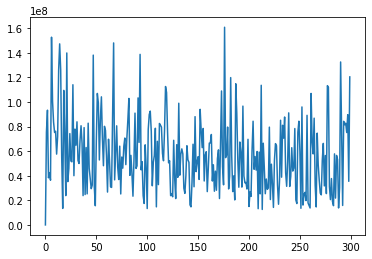

In [105]:
# lets debug the code by an example
mysvm=SVM()
xp,yp=getDataPairForSvm(data[0],data[1])
w,b,loss=mysvm.fit(xp,yp)
plt.plot(loss)
plt.show() # data is not able to converge because the learning rate is too high.

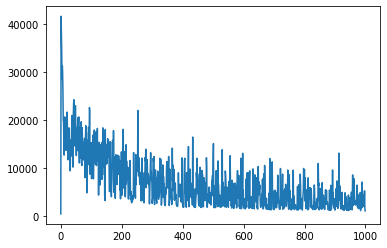

In [110]:
mysvm=SVM()
xp,yp=getDataPairForSvm(data[0],data[1])
w,b,loss=mysvm.fit(xp,yp,learning_rate=0.0000001,batch_size=100,max_itr=1000)
plt.plot(loss)
plt.show() # data is not able to converge because the learning rate is too high.

In [111]:
from sklearn import svm

In [114]:
svm_classifier=svm.SVC(kernel='linear',C=1.0)
svm_classifier.fit(img_data,label)
svm_classifier.score(img_data,label)

0.6522277227722773